<a href="https://colab.research.google.com/github/keunsooyoon/python202206/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84_api_%EC%95%88%EB%A9%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# 코랩 그래프에서 한글 설정 방법 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 위 3줄 실행 후 Runtime - Restart - Runtime ALL

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
# rPMUM8SWlz5zWx6o_uTY
# 4NTWhmt4MR

# 필요 모듈 읽어오기
import os
import sys
import requests

# api 사용을 위한 개발자 정보
client_id = "rPMUM8SWlz5zWx6o_uTY"
client_secret = "4NTWhmt4MR"

# 사용할 api  주소 선택
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

# 인식할 사진
files = {'image': open('gongu.jpg', 'rb')}

# id secret을 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }


# 위 정보들을 모두  api 주소로 전송하여 결과를 response로 받음
response = requests.post(url,  files=files, headers=headers)
                       # (정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)



{"info":{"size":{"width":252,"height":310},"faceCount":1},"faces":[{"roi":{"x":61,"y":117,"width":129,"height":129},"landmark":{"leftEye":{"x":88,"y":148},"rightEye":{"x":150,"y":149},"nose":{"x":120,"y":187},"leftMouth":{"x":98,"y":218},"rightMouth":{"x":149,"y":217}},"gender":{"value":"male","confidence":0.999999},"age":{"value":"30~34","confidence":1.0},"emotion":{"value":"neutral","confidence":0.999904},"pose":{"value":"frontal_face","confidence":0.999776}}]}


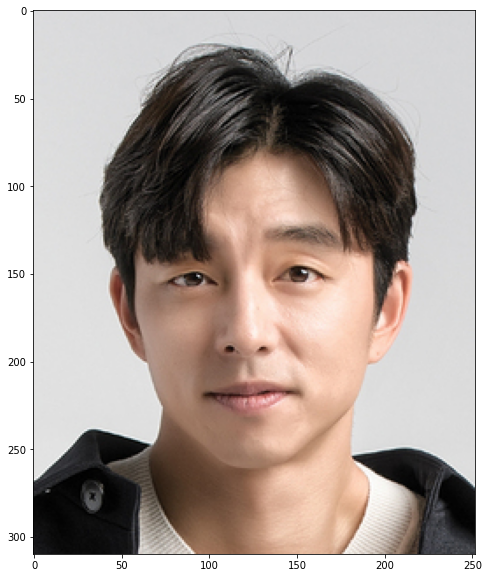

In [3]:
# 그림 (사진) 관련 모듈 임포트
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 가졍올 사전 설정
img = mpimg.imread('gongu.jpg')

# 사진을 띄울 액자(?) 설정
plt.figure(figsize=(10,10))
# 액자(?)에 사진 넣기
plt.imshow(img)
# 액자를 띄우기
plt.show()

In [4]:
import json

parsed = json.loads(response.text)  # 넘겨 받은 분석 결과 json을 딕셔너리로 변환
print(json.dumps(parsed, indent=4, ensure_ascii=False))
# ensure_ascii=False 한글 깨짐 방지
print(type(parsed))

{
    "info": {
        "size": {
            "width": 252,
            "height": 310
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 61,
                "y": 117,
                "width": 129,
                "height": 129
            },
            "landmark": {
                "leftEye": {
                    "x": 88,
                    "y": 148
                },
                "rightEye": {
                    "x": 150,
                    "y": 149
                },
                "nose": {
                    "x": 120,
                    "y": 187
                },
                "leftMouth": {
                    "x": 98,
                    "y": 218
                },
                "rightMouth": {
                    "x": 149,
                    "y": 217
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999999
            },
            "a

In [5]:
#############################################################
#       분석 결과 데이터 정리를 위한 파이썬 기본 문법        #
#############################################################

# dict

dict = {'Name':'공유', 'Age':34, 'etc':['neutral','frontal_face']}


# 키값들만 출력
print(dict.keys())

# 밸류값들만 출력
print(dict.values())

# 키값을 이용한 밸류값 호출
print(dict['Name'])
print(dict.get('Name'))

print(dict.get('Gender')) # 없는 키값을 사용하면  None 나오고 에러가 발생하지는 않는다. 
# print(dict['Gender'])     없는 키값을 사용하면 에러 발생
print(dict.get('Gender','값이없음')) # 키값이 없을때의 출력 메시지까지 지정할 수 있다. 

dict_keys(['Name', 'Age', 'etc'])
dict_values(['공유', 34, ['neutral', 'frontal_face']])
공유
공유
None
값이없음


In [6]:
####################적용########################

# 네이버에 사진을 전송하여 넘겨받은 분석 결과 json 을 딕셔너리로 변환한 parsed

parsed.keys()

dict_keys(['info', 'faces'])

In [7]:
parsed['faces']
# 처음 보낸 공유 사진은 얼굴이 하나라서 한명의 정보 리스트만 볼수 있다. 

[{'age': {'confidence': 1.0, 'value': '30~34'},
  'emotion': {'confidence': 0.999904, 'value': 'neutral'},
  'gender': {'confidence': 0.999999, 'value': 'male'},
  'landmark': {'leftEye': {'x': 88, 'y': 148},
   'leftMouth': {'x': 98, 'y': 218},
   'nose': {'x': 120, 'y': 187},
   'rightEye': {'x': 150, 'y': 149},
   'rightMouth': {'x': 149, 'y': 217}},
  'pose': {'confidence': 0.999776, 'value': 'frontal_face'},
  'roi': {'height': 129, 'width': 129, 'x': 61, 'y': 117}}]

In [8]:
parsed['faces'][0]

{'age': {'confidence': 1.0, 'value': '30~34'},
 'emotion': {'confidence': 0.999904, 'value': 'neutral'},
 'gender': {'confidence': 0.999999, 'value': 'male'},
 'landmark': {'leftEye': {'x': 88, 'y': 148},
  'leftMouth': {'x': 98, 'y': 218},
  'nose': {'x': 120, 'y': 187},
  'rightEye': {'x': 150, 'y': 149},
  'rightMouth': {'x': 149, 'y': 217}},
 'pose': {'confidence': 0.999776, 'value': 'frontal_face'},
 'roi': {'height': 129, 'width': 129, 'x': 61, 'y': 117}}

In [9]:
# roi 사진 에서의 얼굴의 위치값
parsed['faces'][0]['roi'] 

{'height': 129, 'width': 129, 'x': 61, 'y': 117}

In [10]:
# 성별 정보 추출
parsed['faces'][0]['gender']

{'confidence': 0.999999, 'value': 'male'}

In [11]:
# 나이 정보 추출
parsed['faces'][0]['age']

{'confidence': 1.0, 'value': '30~34'}

In [12]:
# 감정 상태 정보 추출
parsed['faces'][0]['emotion']

{'confidence': 0.999904, 'value': 'neutral'}

In [13]:
# 전체 정보 종합 추출

x,y,w,h = parsed['faces'][0]['roi'].values()
gender, gender_c = parsed['faces'][0]['gender'].values()
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()

# values() 를 사용하여 값만 추출하고 그 값들의 개수에 맞게 변수로 받아 저장하였다. 
# 딕셔너리 특성상 순서가 다르게 나올수 있으므로 한 번은 확인해야 한다. 

In [14]:
# 추출한 정보를 사진에 올리기 적합한 형태로 가공하자. 

annot = gender + ' : ' + str(gender_c) + \
        '\n'+ emotion + ' : ' + str(emotion_c) + \
        '\n'+ age + ' : ' + str(age_c)

print(annot)

male : 0.999999
neutral : 0.999904
30~34 : 1.0


Text(61, 276, 'male : 0.999999\nneutral : 0.999904\n30~34 : 1.0')

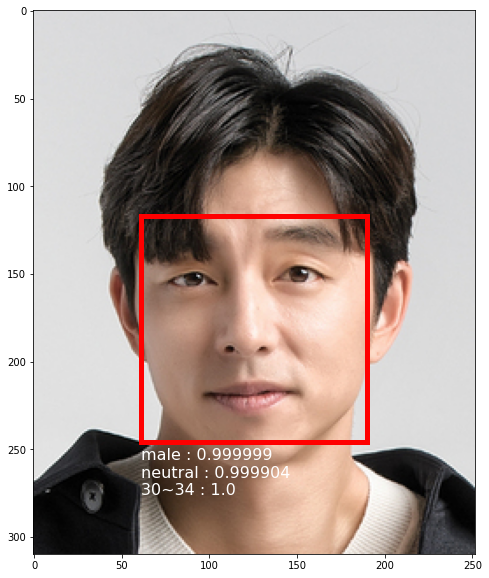

In [15]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 가졍올 사전 설정
img = mpimg.imread('gongu.jpg')

fig, ax = plt.subplots(figsize=(10,10))   # fig 액자(?), ax 수정한 사진 의 크기 설정
ax.imshow(img)                            # 먼저 기본사진

# 사진 수정
rect_face = patches.Rectangle((x,y),w,h,  # x,y 얼굴의 시작지점, w, h 얼굴의 크기
                              linewidth = 5,
                              edgecolor = 'r',
                              facecolor = 'none')
ax.add_patch(rect_face)

plt.text(x,y+h+30, annot, fontsize = 16, color='white')

Text(260, 416, 'male : 0.995848\nneutral : 1.0\n19~23 : 1.0\n한글 테스트')

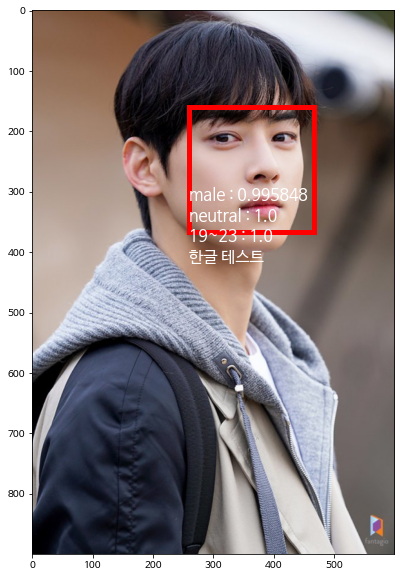

In [21]:

import os
import sys
import requests
import json

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

# 네이버에 사진 전송후 분석 결과 받기
client_id = "rPMUM8SWlz5zWx6o_uTY"
client_secret = "4NTWhmt4MR"
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('photo.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
parsed = json.loads(response.text)  # 넘겨 받은 분석 결과 json을 딕셔너리로 변환

# 사진에 정보 올리기
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x,y,w,h = parsed['faces'][0]['roi'].values()
gender, gender_c = parsed['faces'][0]['gender'].values()
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()


img = mpimg.imread('photo.jpg')
fig, ax = plt.subplots(figsize=(10,10))   # fig 액자(?), ax 수정한 사진 의 크기 설정
ax.imshow(img)                            # 먼저 기본사진
rect_face = patches.Rectangle((x,y),w,h,  # x,y 얼굴의 시작지점, w, h 얼굴의 크기
                              linewidth = 5,
                              edgecolor = 'r',
                              facecolor = 'none')
ax.add_patch(rect_face)


annot = gender + ' : ' + str(gender_c) + \
        '\n'+ emotion + ' : ' + str(emotion_c) + \
        '\n'+ age + ' : ' + str(age_c) + \
        '\n'+ '한글 테스트'

plt.text(x,y+h+50, annot, fontsize = 16, color='white')

In [22]:
##############################################################
#                여러 사람 사진 처리                         #
##############################################################



import os
import sys
import requests

client_id = "rPMUM8SWlz5zWx6o_uTY"
client_secret = "4NTWhmt4MR"

url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" // 유명인 얼굴인식
files = {'image': open('family.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)


{"info":{"size":{"width":550,"height":825},"faceCount":6},"faces":[{"roi":{"x":396,"y":224,"width":40,"height":40},"landmark":{"leftEye":{"x":406,"y":233},"rightEye":{"x":424,"y":233},"nose":{"x":416,"y":243},"leftMouth":{"x":407,"y":252},"rightMouth":{"x":426,"y":251}},"gender":{"value":"male","confidence":0.999976},"age":{"value":"38~42","confidence":0.554915},"emotion":{"value":"laugh","confidence":0.774115},"pose":{"value":"frontal_face","confidence":0.999844}},{"roi":{"x":270,"y":331,"width":38,"height":38},"landmark":{"leftEye":{"x":282,"y":339},"rightEye":{"x":297,"y":339},"nose":{"x":287,"y":350},"leftMouth":{"x":284,"y":355},"rightMouth":{"x":298,"y":355}},"gender":{"value":"male","confidence":0.631549},"age":{"value":"39~43","confidence":0.419542},"emotion":{"value":"smile","confidence":0.999684},"pose":{"value":"frontal_face","confidence":0.999179}},{"roi":{"x":214,"y":245,"width":40,"height":40},"landmark":{"leftEye":{"x":227,"y":252},"rightEye":{"x":244,"y":254},"nose":{"x

In [23]:
parsed = json.loads(response.text)
print(type(parsed))

<class 'dict'>


In [24]:
parsed.keys()

dict_keys(['info', 'faces'])

In [27]:
parsed['info']  # 사진의 기본 - 정보 얼굴의 갯수  사진 전체 크기

{'faceCount': 6, 'size': {'height': 825, 'width': 550}}

In [28]:
parsed['faces']

[{'age': {'confidence': 0.554915, 'value': '38~42'},
  'emotion': {'confidence': 0.774115, 'value': 'laugh'},
  'gender': {'confidence': 0.999976, 'value': 'male'},
  'landmark': {'leftEye': {'x': 406, 'y': 233},
   'leftMouth': {'x': 407, 'y': 252},
   'nose': {'x': 416, 'y': 243},
   'rightEye': {'x': 424, 'y': 233},
   'rightMouth': {'x': 426, 'y': 251}},
  'pose': {'confidence': 0.999844, 'value': 'frontal_face'},
  'roi': {'height': 40, 'width': 40, 'x': 396, 'y': 224}},
 {'age': {'confidence': 0.419542, 'value': '39~43'},
  'emotion': {'confidence': 0.999684, 'value': 'smile'},
  'gender': {'confidence': 0.631549, 'value': 'male'},
  'landmark': {'leftEye': {'x': 282, 'y': 339},
   'leftMouth': {'x': 284, 'y': 355},
   'nose': {'x': 287, 'y': 350},
   'rightEye': {'x': 297, 'y': 339},
   'rightMouth': {'x': 298, 'y': 355}},
  'pose': {'confidence': 0.999179, 'value': 'frontal_face'},
  'roi': {'height': 38, 'width': 38, 'x': 270, 'y': 331}},
 {'age': {'confidence': 0.693279, 'val

In [29]:
parsed['faces'][0]

{'age': {'confidence': 0.554915, 'value': '38~42'},
 'emotion': {'confidence': 0.774115, 'value': 'laugh'},
 'gender': {'confidence': 0.999976, 'value': 'male'},
 'landmark': {'leftEye': {'x': 406, 'y': 233},
  'leftMouth': {'x': 407, 'y': 252},
  'nose': {'x': 416, 'y': 243},
  'rightEye': {'x': 424, 'y': 233},
  'rightMouth': {'x': 426, 'y': 251}},
 'pose': {'confidence': 0.999844, 'value': 'frontal_face'},
 'roi': {'height': 40, 'width': 40, 'x': 396, 'y': 224}}

In [30]:
parsed['faces'][0]['roi']

{'height': 40, 'width': 40, 'x': 396, 'y': 224}

In [38]:
x,y,w,h = parsed['faces'][0]['roi'].values()
gender, gender_c = parsed['faces'][0]['gender'].values()
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()

# 딕셔너리는 unordered 즉 순서가 없으므로 최초 한 번 출력되는 순서를 확인하여 수정한다. 

annot = gender + ' : ' + str(gender_c) + \
        '\n' + emotion + ' : ' + str(emotion_c) + \
        '\n' + age + ' : ' + str(age_c)
print(annot)


male : 0.999976
laugh : 0.774115
38~42 : 0.554915


Text(396, 314, 'male : 0.999976\nlaugh : 0.774115\n38~42 : 0.554915')

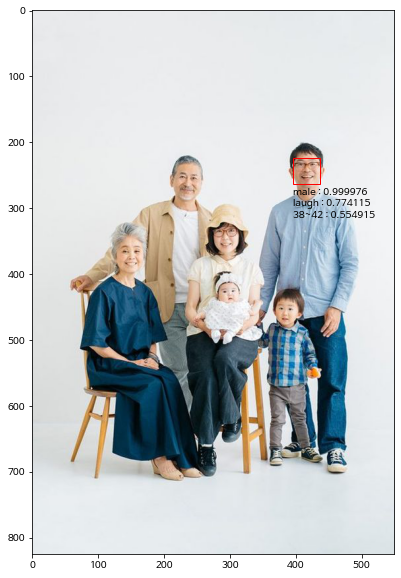

In [45]:
import matplotlib.patches as patches

img = mpimg.imread('family.jpg')

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img)

rect_face = patches.Rectangle((x,y),w,h,
                              linewidth=1,
                              edgecolor='r',
                              facecolor='none'
                              )
ax.add_patch(rect_face)

plt.text(x,y+h+50, annot)